### 1. Importer les biblioth`eques n´ecessaires

In [57]:
! pip install --upgrade scikit-learn


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### 2. Charger le jeu de donnees

In [59]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

### 3. Diviser les donn´ees en ensembles d’entraˆınement et de test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 4. Créeer et entraıner les mod`eles d’arbres de d´ecision

#### 4.1 Modèle CART (utilisé par d´efaut dans Scikit-Learn)

In [61]:
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Formule de calcul de l'impureté de Gini :
Pour un nœud contenant des exemples répartis sur 
𝐶
C classes, l'impureté de Gini est donnée par :
$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$
où p_i est la proportion des exemples de la classe 𝑖 dans le nœud.


##### Pourquoi l'algorithme CART utilise-t-il l'impureté de Gini comme critère ?
L'algorithme CART (Classification and Regression Trees) utilise l'impureté de Gini pour les raisons suivantes :

#### Simplicité et rapidité de calcul : 
Comparée à d'autres critères de sélection, comme le gain d'information basé sur l'entropie, l'impureté de Gini est plus simple et plus rapide à calculer. Cela fait de Gini un choix naturel pour des calculs rapides dans les arbres de décision.

#### Performances comparables :
En pratique, l'utilisation de l'impureté de Gini donne souvent des résultats similaires à ceux obtenus en utilisant d'autres critères comme l'entropie, tout en étant plus efficace en termes de calcul. Cela permet à l'algorithme CART de fonctionner efficacement, même sur des jeux de données de grande taille.

#### Critère adapté pour la classification binaire et multi-classes : 
L'impureté de Gini s'adapte bien à différents types de classification, qu'il s'agisse de problèmes binaires ou multi-classes.

#### 4.1.2. Prédire les étiquettes pour l'ensemble de test

In [62]:
y_pred = cart_model.predict(X_test)

#### 4.1.3. Calculer l'exactitude (accuracy) du modèle

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


#### 4.1.4. Afficher la matrice de confusion

In [64]:
print("Confusion Matrix:")
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


#### 4.1.5. Visualiser l'arbre de décision

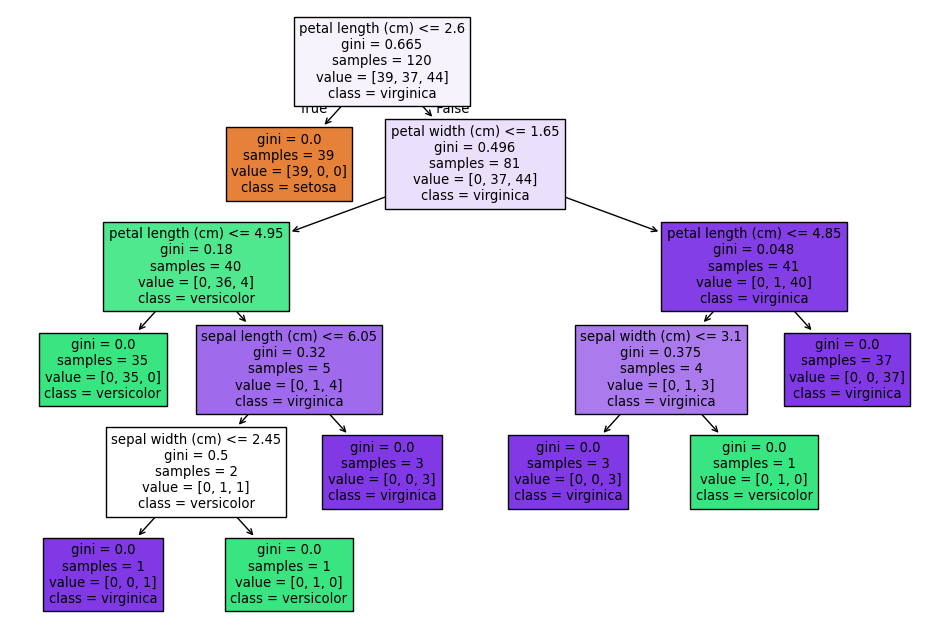

In [65]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(cart_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

#### 4.2 Mod`ele ID3 (utilise l’information gain)

In [66]:
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Comment l'ID3 utilise-t-il le gain d'information pour choisir les attributs 
L'algorithme ID3 (Iterative Dichotomiser 3) utilise le gain d'information pour choisir les attributs sur lesquels diviser les données à chaque nœud de l'arbre de décision. Le gain d'information mesure la réduction de l'entropie (c'est-à-dire le désordre ou l'incertitude) après avoir divisé les données en fonction d'un attribut particulier.

##### Étapes du processus :
##### Calcul de l'entropie : 
L'entropie \(E(S)\) d'un ensemble de données \(S\) est définie par :
$$
E(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

##### Calcul du gain d'information :
$$
IG(A) = E(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} E(S_v)
$$
$
$


#### Quelles sont les limitations de l'algorithme ID3 ?
###### Prédisposition aux attributs à de nombreuses valeurs :
Le gain d'information favorise les attributs avec un grand nombre de valeurs possibles, car ces attributs peuvent créer plus de sous-groupes et donc potentiellement réduire l'entropie plus rapidement, même si cela ne conduit pas nécessairement à des modèles utiles.
###### Sensible au bruit :
L'ID3 est sensible aux petites variations dans les données. Si des données bruitées ou des valeurs aberrantes sont présentes, l'algorithme peut sur-ajuster l'arbre pour capturer des détails non significatifs, ce qui conduit à un modèle plus complexe et moins généralisable (surapprentissage).

#### 4.3 Modèle C4.5/C5.0 (simul´e avec des paramètres spécifiques)

In [67]:
c45_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=2)
c45_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=2)

### En quoi C4.5 améliore-t-il ID3 ?

C4.5 est une amélioration de l'algorithme ID3, et il introduit plusieurs fonctionnalités clés qui contribuent à ses performances et à sa robustesse :

 **Gestion des attributs continus** :
   - **ID3** : Ne gère que les attributs discrets et nécessite une discrétisation préalable des attributs continus.
   - **C4.5** : Gère à la fois les attributs discrets et continus en utilisant des seuils pour diviser les attributs continus.

 **Critère d'évaluation basé sur le gain d'information normalisé** :
   - **ID3** : Utilise uniquement le gain d'information pour évaluer les attributs.
   - **C4.5** : Utilise le gain d'information normalisé, ce qui permet de tenir compte du nombre de valeurs distinctes de chaque attribut. Cela évite de favoriser les attributs ayant de nombreuses valeurs discrètes, ce qui peut conduire à des arbres sur-ajustés.
**Flexibilité des paramètres** :
   - **C4.5** : Offre plus de flexibilité avec des paramètres tels que `min_samples_split`, `min_samples_leaf`, et `max_depth`, permettant de mieux contrôler la taille et la forme de l'arbre.

### Que signifie le paramètre `min_samples_leaf` et comment influence-t-il la structure de l’arbre ?

Le paramètre `min_samples_leaf` dans un arbre de décision détermine le nombre minimum d'échantillons (observations) qu'une feuille doit contenir. Voici comment ce paramètre influence la structure de l'arbre :



#### 5. Faire des prédictions et ´evaluer les mod`eles

In [68]:
models = [cart_model, id3_model, c45_model]
model_names = ['CART', 'ID3', 'C4.5']

for model, name in zip(models, model_names):
    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calcul de la précision
    accuracy = accuracy_score(y_test, y_pred)
    
    # Affichage de la précision et du rapport de classification
    print(f'Précision du modèle {name}: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


Précision du modèle CART: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Précision du modèle ID3: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Précision du modèle C4.5: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92    

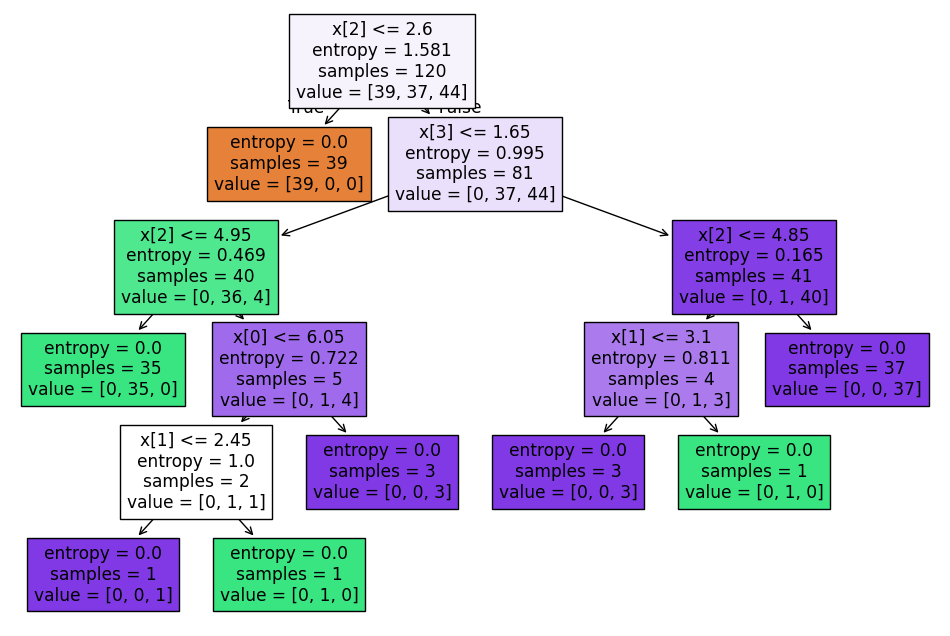

In [69]:
plt.figure(figsize=(12,8))
plt.title("Arbre ID3")
tree.plot_tree(id3_model, filled=True)
plt.show()


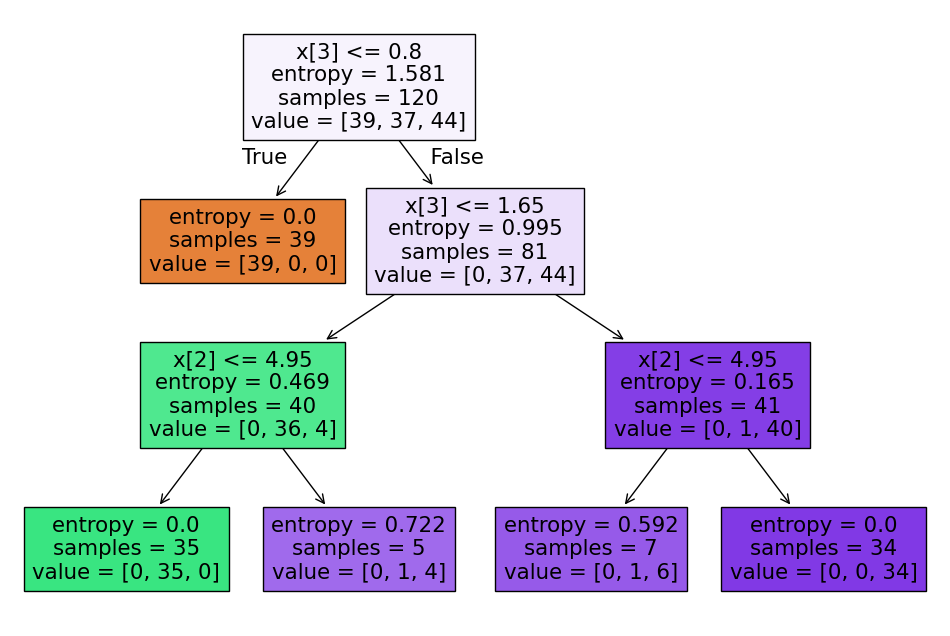

In [70]:
plt.figure(figsize=(12,8))
plt.title("Arbre C.45")
tree.plot_tree(c45_model, filled=True)
plt.show()


### Questions :

#### Que pouvez-vous déduire sur la complexité des arbres en fonction des critères utilisés ?

1. **Critères de Splitting** :
   - Les critères tels que Gini (utilisé par CART) et le gain d’information (utilisé par ID3 et C4.5) influencent la complexité des arbres de décision. 
   - Un critère comme le gain d’information peut mener à des arbres plus profonds en favorisant des divisions qui maximisent la séparation des classes, ce qui peut accroître la complexité.

2. **Surajustement (Overfitting)** :
   - Des critères plus complexes peuvent conduire à des arbres de décision qui s'ajustent trop aux données d'entraînement, ce qui augmente la complexité et rend le modèle moins généralisable.
   - Par exemple, C4.5 utilise le gain d’information normalisé, ce qui peut réduire le risque de surajustement en évitant de favoriser des attributs avec beaucoup de valeurs distinctes.

3. **Élagage** :
   - La présence d’une méthode d’élagage, comme celle utilisée dans C4.5, peut réduire la complexité de l’arbre en supprimant les branches qui n’apportent pas d’informations supplémentaires significatives.
   - Les modèles sans élagage, comme l'ID3, peuvent aboutir à des arbres plus complexes et moins interprétables.

#### Comment la profondeur de l’arbre affecte-t-elle son interprétabilité ?

1. **Interprétabilité** :
   - Un arbre de décision peu profond (moins de niveaux) est généralement plus facile à interpréter. Les décisions peuvent être suivies de manière intuitive, et il est plus simple de comprendre comment le modèle parvient à ses prédictions.
   - En revanche, un arbre très profond devient difficile à visualiser et à comprendre. Les nombreuses décisions et règles qu'il contient peuvent rendre le modèle opaque.

2. **Risque de Surajustement** :
   - Les arbres plus profonds ont tendance à surajuster les données d’entraînement, ce qui nuit à leur capacité à généraliser. Cela rend difficile la compréhension des décisions prises par le modèle, car elles peuvent être basées sur des variations spécifiques des données d’entraînement plutôt que sur des tendances générales.

3. **Visualisation** :
   - Les arbres peu profonds peuvent être visualisés en entier sur un écran ou une feuille de papier, permettant une analyse facile des décisions. Pour des arbres plus profonds, il est souvent nécessaire de réduire la taille de la visualisation ou de n'afficher qu'une partie de l'arbre, ce qui complique l'interprétation.

